Find the description here:  https://gerardnico.com/data_mining/stepwise_regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures

def convertime(datetime_str):
    return (datetime.strptime(datetime_str, "%Y%m%dT000000").timestamp())

Exploration of train dataset

In [2]:
train = pd.read_csv('kc_house_train_data.csv')
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
print("train dataset shape", train.shape)

train dataset shape (17384, 21)


In [98]:
print(list(train.columns))

['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17384 entries, 0 to 17383
Data columns (total 21 columns):
id               17384 non-null int64
date             17384 non-null object
price            17384 non-null float64
bedrooms         17384 non-null int64
bathrooms        17384 non-null float64
sqft_living      17384 non-null int64
sqft_lot         17384 non-null int64
floors           17384 non-null float64
waterfront       17384 non-null int64
view             17384 non-null int64
condition        17384 non-null int64
grade            17384 non-null int64
sqft_above       17384 non-null int64
sqft_basement    17384 non-null int64
yr_built         17384 non-null int64
yr_renovated     17384 non-null int64
zipcode          17384 non-null int64
lat              17384 non-null float64
long             17384 non-null float64
sqft_living15    17384 non-null int64
sqft_lot15       17384 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.8+ MB


In [6]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.738400e+04,1.738400e+04,17384.000000,17384.000000,17384.000000,1.738400e+04,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000
mean,4.574349e+09,5.393666e+05,3.369363,2.115048,2080.029510,1.509191e+04,1.494248,0.007651,0.236079,3.410780,7.655028,1787.844512,292.184998,1971.152727,83.107973,98077.936896,47.559313,-122.213281,1985.994995,12776.380867
std,2.872356e+09,3.696912e+05,0.906468,0.771783,921.630888,4.145927e+04,0.539443,0.087136,0.768008,0.649792,1.169818,827.107595,444.404136,29.328722,398.692283,53.525617,0.138703,0.140906,686.512835,27175.730523
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.124087e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.049500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.468650,-122.328000,1490.000000,5100.000000
50%,3.892800e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.616000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571400,-122.229000,1840.000000,7620.000000
75%,7.304301e+09,6.400000e+05,4.000000,2.500000,2550.000000,1.066525e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.677625,-122.125000,2360.000000,10065.250000
max,9.900000e+09,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
print("feature"," unique values")
for feature in train.columns:
    print(feature,"                 ",train[feature].value_counts().count())
print("date","                 ",train['date'].value_counts().count())

feature  unique values
id                   17273
date                   368
price                   3552
bedrooms                   11
bathrooms                   29
sqft_living                   957
sqft_lot                   8439
floors                   6
waterfront                   2
view                   5
condition                   5
grade                   12
sqft_above                   869
sqft_basement                   295
yr_built                   116
yr_renovated                   70
zipcode                   70
lat                   4864
long                   729
sqft_living15                   717
sqft_lot15                   7571
date                   368


In [8]:
train['date'] = train['date'].apply(convertime)
train = train.drop(columns=['id'])
train_x = train.drop(columns=['price'])
train_y = train.price

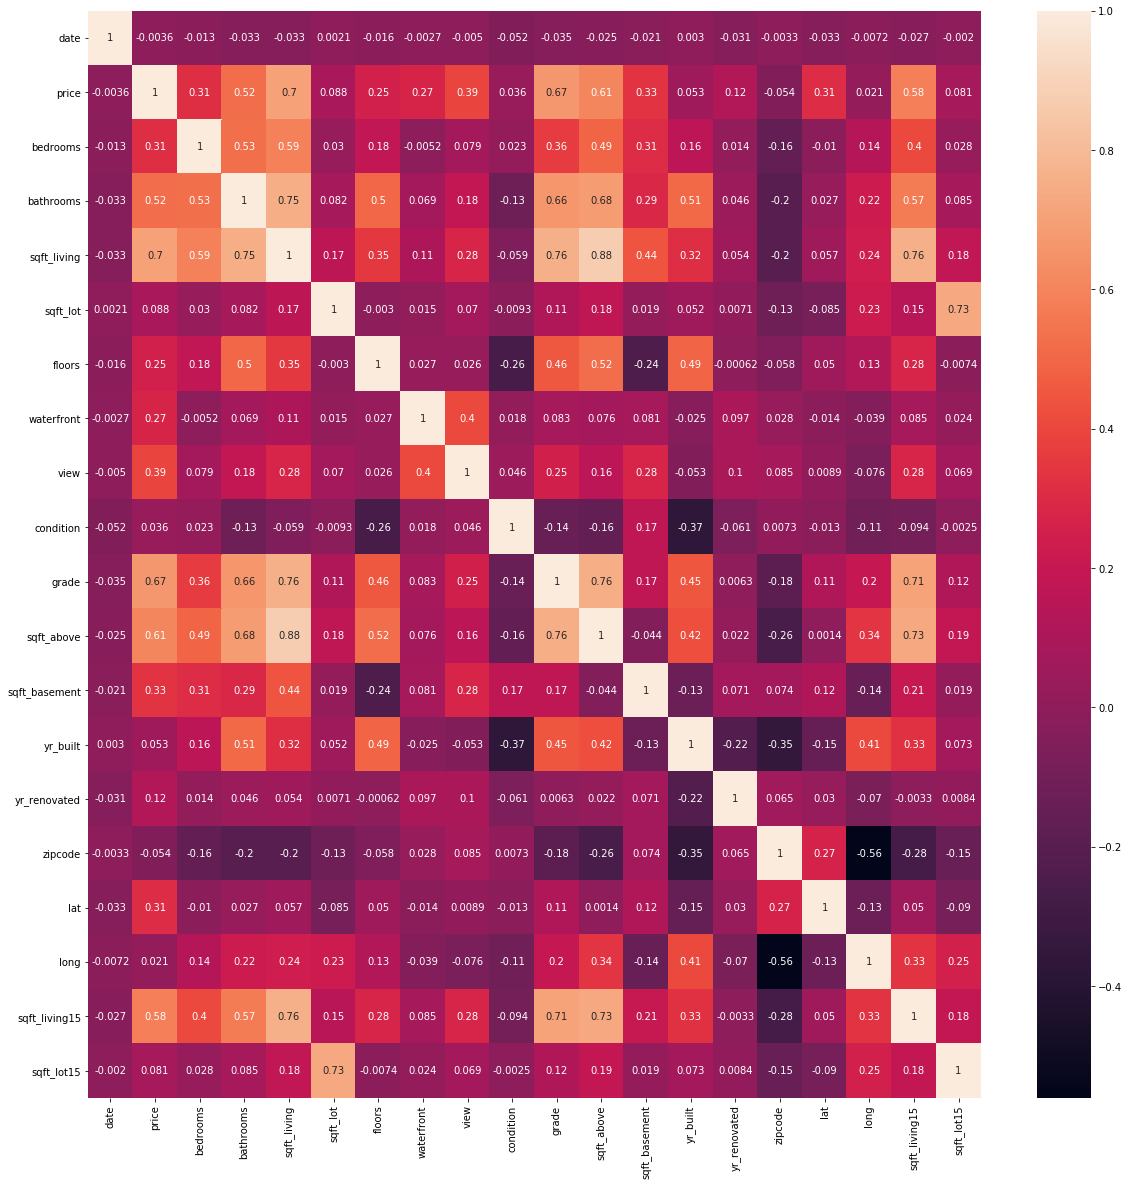

In [9]:
import seaborn as sns
plt.figure(figsize=(20, 20))

f = (
    train.loc[:, list(train.columns)]
        
).corr()

sns.heatmap(f, annot=True)

In [25]:
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])
train.apply(minMax)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
min,1.398969e+09,75000.0,0,0.0,290,520,1.0,0,0,1,1,290,0,1900,0,98001,47.1593,-122.519,399,651
max,1.432665e+09,7700000.0,10,8.0,13540,1651359,3.5,1,4,5,13,9410,4820,2015,2015,98199,47.7776,-121.315,6210,871200


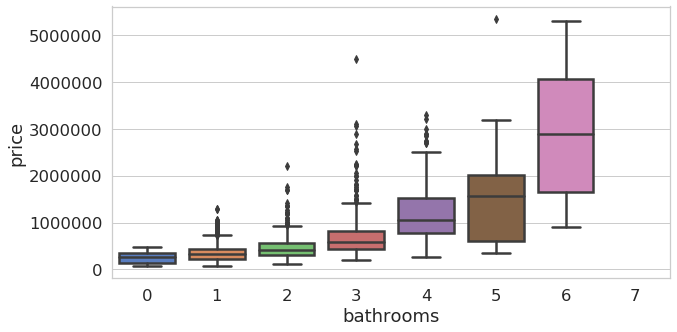

In [52]:
plt.figure(figsize=(10, 5))
import math
sns.set_style("whitegrid") 
# xint = range( math.ceil(min(train['floors'])), math.ceil(max(train['floors']))+1)

# plt.xticks(xint)
sns.boxplot(x = 'bathrooms', y = 'price', data = train, order = range(0,8)) 
# plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


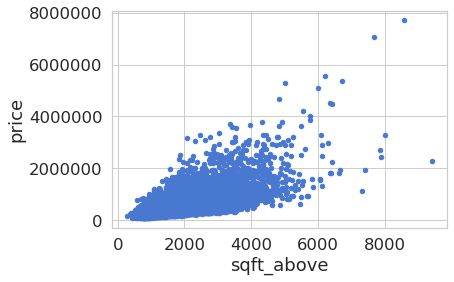

In [107]:
train.plot.scatter(y='price', x='sqft_above')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


date


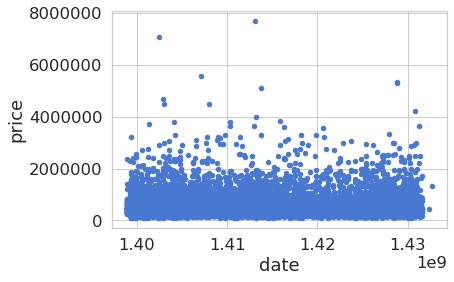

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


sqft_living


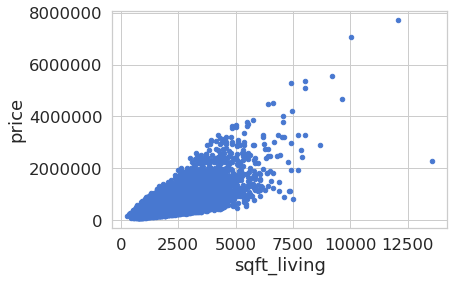

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


sqft_lot


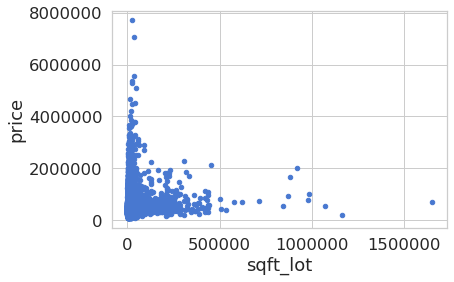

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


sqft_above


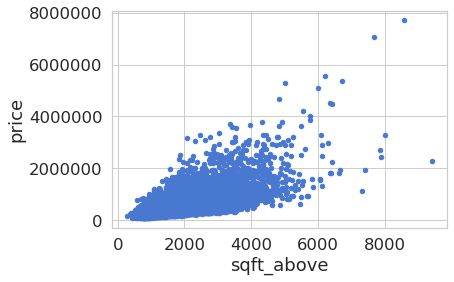

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


sqft_basement


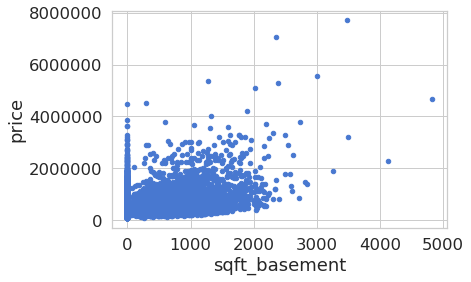

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


yr_built


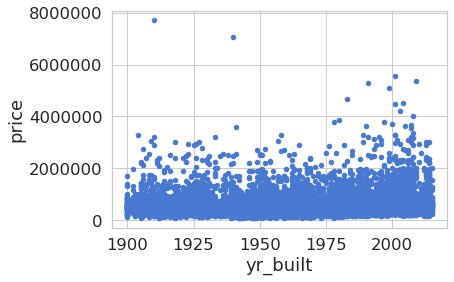

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


yr_renovated


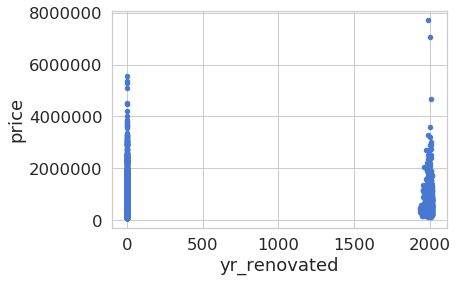

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


zipcode


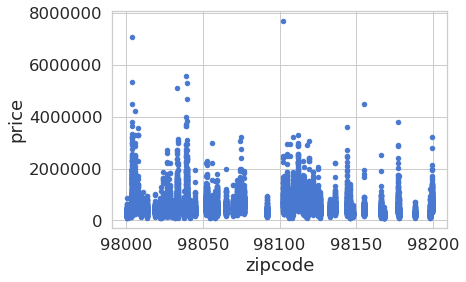

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


lat


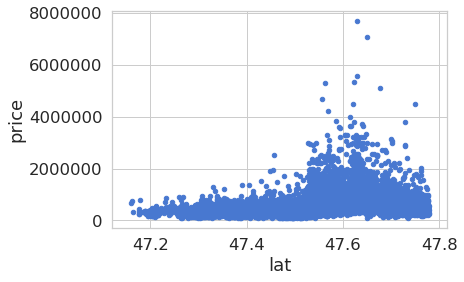

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


long


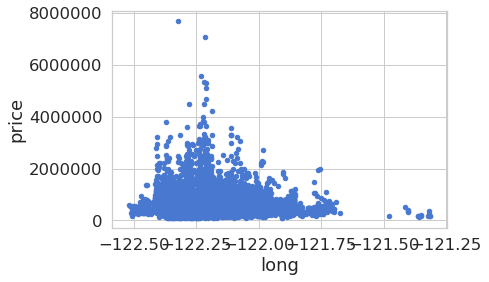

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


sqft_living15


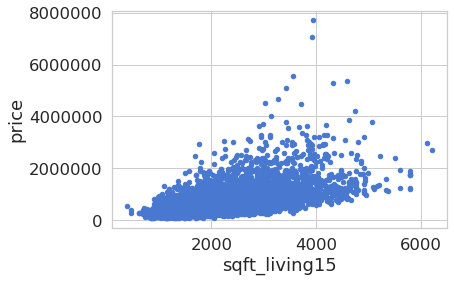

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


sqft_lot15


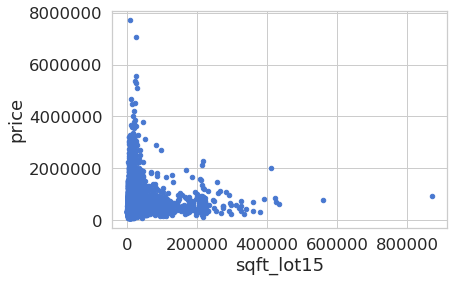

In [111]:
# fig, axs = plt.subplots(10, 2)
for el in ['date', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 
        'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'] :
    print(el)
    train.plot.scatter(y='price', x=el)
    plt.xlabel(el)
    plt.ylabel("price")
    plt.show()
    plt.close()
# axs.show()
    
# axs[0, 0].plot(x, y)
# axs[0, 0].set_title('Axis [0,0]')

# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
# train['sqft_above'].value_counts().sort_index().plot.line()

KeyError: 0

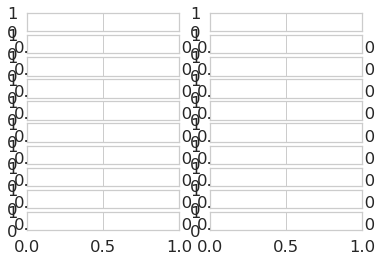

In [93]:
# f,a = plt.subplots(10,2)
# a = a.ravel()
# for idx,ax in enumerate(a):
#     ax.hist(train[idx])
#     ax.set_title(titles[idx])
#     ax.set_xlabel(xaxes[idx])
#     ax.set_ylabel(yaxes[idx])
# plt.tight_layout()

Exploration for test dataset

In [11]:
test = pd.read_csv('kc_house_test_data.csv')
test.head()
test['date'] = test['date'].apply(convertime)

In [12]:
test = test.drop(columns=['id'])
test_x = test.drop(columns=['price'])
test_y = test.price

In [13]:
test_y.shape
x_test = test_x
y_test=test_y

In [14]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(train_x.to_numpy())
scaler.transform(train_x)
scaler.transform(test_x)

array([[-1.36609463, -0.40748647, -1.44481169, ..., -0.11155904,
        -0.30006856, -0.0029211 ],
       [ 0.76862898,  0.69572873,  1.14666648, ..., -1.147741  ,
         0.22433584, -0.32295851],
       [ 0.04229149, -0.40748647, -0.14907261, ..., -0.03349053,
        -1.39257774, -0.29701549],
       ...,
       [-0.134864  ,  0.69572873,  0.49879694, ...,  0.32846344,
         0.77787382, -0.24851494],
       [ 1.03436221,  0.69572873,  0.49879694, ..., -1.05547822,
        -0.22723462, -0.20520299],
       [-1.13579249, -1.51070166, -1.76874647, ..., -0.60835861,
        -1.40714453, -0.39629811]])

In [15]:
import matplotlib.patheffects as PathEffects
%matplotlib inline
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

def fashion_scatter(x):
    # choose a color palette with seaborn.
#     num_classes = len(np.unique(colors))
#     palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40 )
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

#     for i in range(num_classes):

#         # Position of each label at median of data points.

#         xtext, ytext = np.median(x[colors == i, :], axis=0)
#         txt = ax.text(xtext, ytext, str(i), fontsize=24)
#         txt.set_path_effects([
#             PathEffects.Stroke(linewidth=5, foreground="w"),
#             PathEffects.Normal()])
#         txts.append(txt)

    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [])

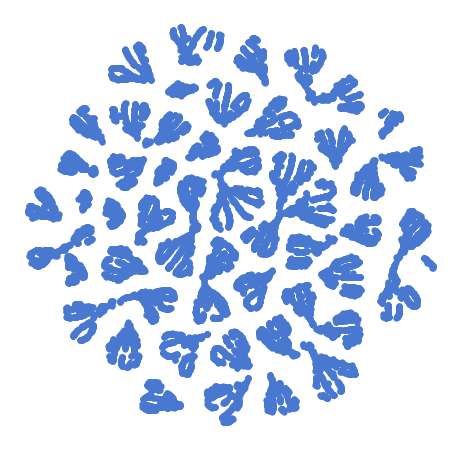

In [16]:
from sklearn.manifold import TSNE
finaldata = np.array([[2,4],[4,6],[4,9]])
fashion_tsne = TSNE(random_state=RS).fit_transform(train.to_numpy())
fashion_scatter(fashion_tsne)

Text(0.5, 1.0, 'Axis [1,1]')

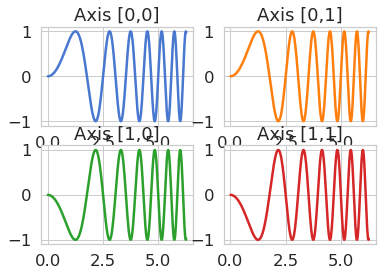

In [77]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0,0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0,1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1,0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1,1]')

# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()